In [1]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 159MB/s]


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense,Flatten,Embedding,Conv2D,MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.callbacks import Callback
import os 
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                  MaxPooling2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPooling2D(2,2),
                  Conv2D(128,(3,3),activation='relu'),
                  MaxPooling2D(2,2),
                   Conv2D(128,(3,3),activation='relu'),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')])

In [5]:
model.compile(optimizer=RMSprop(learning_rate=0.01),loss='binary_crossentropy',metrics='accuracy')

In [6]:
train_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_data1=ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
a=model.fit(train_data,epochs=15,steps_per_epoch=100,validation_data=validation_data1,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 31s - loss: 45.8607 - accuracy: 0.5040 - val_loss: 0.6966 - val_accuracy: 0.5000 - 31s/epoch - 311ms/step
Epoch 2/15
100/100 - 10s - loss: 0.6954 - accuracy: 0.4950 - val_loss: 0.6932 - val_accuracy: 0.5000 - 10s/epoch - 101ms/step
Epoch 3/15
100/100 - 10s - loss: 0.6939 - accuracy: 0.4970 - val_loss: 0.6933 - val_accuracy: 0.5000 - 10s/epoch - 102ms/step
Epoch 4/15
100/100 - 10s - loss: 0.6938 - accuracy: 0.4940 - val_loss: 0.6934 - val_accuracy: 0.5000 - 10s/epoch - 102ms/step
Epoch 5/15
100/100 - 10s - loss: 0.6936 - accuracy: 0.5040 - val_loss: 0.6935 - val_accuracy: 0.5000 - 10s/epoch - 100ms/step
Epoch 6/15
100/100 - 10s - loss: 0.6939 - accuracy: 0.4840 - val_loss: 0.6933 - val_accuracy: 0.5000 - 10s/epoch - 100ms/step
Epoch 7/15
100/100 - 10s - loss: 0.6931 - accuracy: 0.5100 - val_loss: 0.6937 - val_accuracy: 0.5000 - 10s/epoch - 101ms/step
Epoch 8/15
100/100 - 10s - loss: 0.6936 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000 - 10s/epoch - 10

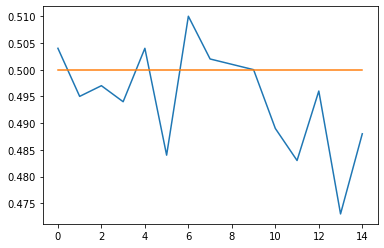

In [8]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])

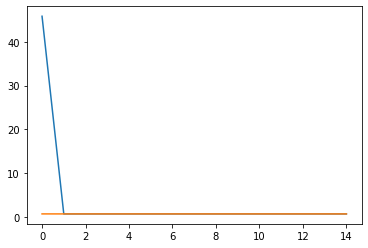

In [9]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])